In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from MLLibrary import LogisticRegression, Utilities,NormalizationScale, StandardizationScale, Metrics

In [2]:
x_data, y_data = Utilities.load_data('data/Classification_train.csv',start_x = 1,start_y = 0,end_y = 1)
x_train,y_train, x_cv,y_cv = Utilities.split_data(70, x_data, y_data)

print(f'Train data: {x_train.shape} {y_train.shape}')
print(f'CV data: {x_cv.shape} {y_cv.shape}')

Train data: (21000, 784) (21000, 1)
CV data: (9000, 784) (9000, 1)


In [3]:
scaler = StandardizationScale()
x_train_scaled = scaler.fit_transform(x_train)
x_cv_scaled = scaler.transform(x_cv)
scaler2 = NormalizationScale()
x_train_scaled = scaler2.fit_transform(x_train_scaled)
x_cv_scaled = scaler2.transform(x_cv_scaled)

print(f'Train data: {x_train_scaled.shape}')
print(f'CV data: {x_cv_scaled.shape}')

Train data: (21000, 784)
CV data: (9000, 784)


Epoch  10 ⫸ Cost 0.021 ⫷
Epoch  20 ⫸ Cost 0.019 ⫷
Epoch  30 ⫸ Cost 0.018 ⫷
Epoch  40 ⫸ Cost 0.017 ⫷
Epoch  50 ⫸ Cost 0.016 ⫷
Epoch  60 ⫸ Cost 0.016 ⫷
Epoch  70 ⫸ Cost 0.015 ⫷
Epoch  80 ⫸ Cost 0.015 ⫷
Epoch  90 ⫸ Cost 0.015 ⫷
Epoch 100 ⫸ Cost 0.015 ⫷


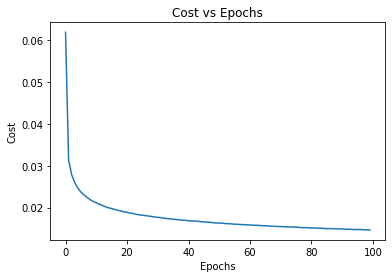

In [8]:
alpha = 0.6
epochs = 100
lambda_ = 1e-12

model = LogisticRegression()
_,_,cost_history = model.fit(x_train_scaled, y_train, alpha, epochs,lambda_, plot_cost=True)

In [9]:
yhat_train = model.predict(x_train_scaled)
acc_train = Metrics.classifier_accuracy(yhat_train, y_train)
print(f'Accuracy Train: {acc_train:.2f}')

yhat_cv = model.predict(x_cv_scaled)
acc_cv = Metrics.classifier_accuracy(yhat_cv, y_cv)
print(f'Accuracy CV: {acc_cv:.2f}')

Accuracy Train: 98.28
Accuracy CV: 96.69


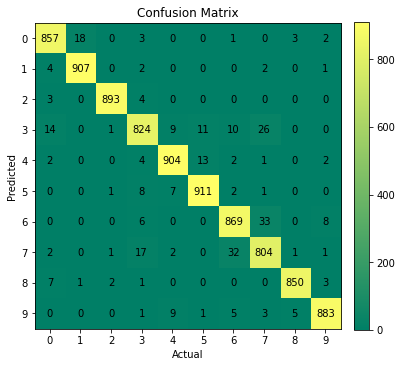

Precision: 0.9667141236435477
Recall: 0.9667645546930634


In [10]:
conf_mat, p,r = Metrics.confusion_matrix(yhat_cv,y_cv,metrics=True)
print(f'Precision: {p}')
print(f'Recall: {r}')